# PLUTO Dataset Analysis for Office Apocalypse Algorithm

## Overview
This notebook provides a comprehensive analysis of the NYC PLUTO (Primary Land Use Tax Lot Output) dataset, which serves as the **foundational backbone** for our Office Apocalypse Algorithm. PLUTO contains essential building characteristics that no other dataset can provide, making it indispensable for predicting office building vacancy risk.

## Why PLUTO is Critical:
- **Building Fundamentals**: Only source for building square footage, age, and physical characteristics
- **Zoning Intelligence**: Commercial zoning classifications that determine office potential
- **Spatial Foundation**: BBL (Borough-Block-Lot) identifiers that enable spatial data integration
- **Assessment Data**: Property values and assessments that reflect market conditions

## Dataset Source
- **File**: `pluto_25v2_1.csv`
- **Source**: NYC Department of City Planning
- **Coverage**: All NYC tax lots with building and land use information

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Load and Explore Dataset Structure

Let's begin by loading the PLUTO dataset and understanding its structure. This initial exploration will reveal the comprehensive building information that makes PLUTO irreplaceable for office building analysis.

In [2]:
# Load PLUTO dataset
pluto_path = r"c:\Users\pcric\Desktop\capstone_project\office_apocalypse_algorithm_project\data\raw\pluto_25v2_1.csv"
print("Loading PLUTO dataset...")
df_pluto = pd.read_csv(pluto_path)

print(f"Dataset shape: {df_pluto.shape}")
print(f"Number of tax lots: {len(df_pluto):,}")
print(f"Number of features: {len(df_pluto.columns)}")
print("\n" + "="*60)
print("PLUTO Dataset Overview")
print("="*60)

Loading PLUTO dataset...
Dataset shape: (857736, 92)
Number of tax lots: 857,736
Number of features: 92

PLUTO Dataset Overview


In [3]:
# Explore basic structure
print("Dataset Info:")
df_pluto.info()
print("\n" + "="*50)
print("First 5 rows:")
df_pluto.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857736 entries, 0 to 857735
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               857736 non-null  object 
 1   block                 857736 non-null  int64  
 2   lot                   857736 non-null  int64  
 3   cd                    857103 non-null  float64
 4   bct2020               857084 non-null  float64
 5   bctcb2020             857084 non-null  float64
 6   ct2010                857084 non-null  float64
 7   cb2010                857084 non-null  float64
 8   schooldist            856375 non-null  float64
 9   council               857101 non-null  float64
 10  zipcode               856362 non-null  float64
 11  firecomp              856356 non-null  object 
 12  policeprct            856370 non-null  float64
 13  healthcenterdistrict  856370 non-null  float64
 14  healtharea            856370 non-null 

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,QN,6421,38,407.0,4083700.0,4.083700e+10,837.0,3005.0,25.0,20.0,11355.0,L129,109.0,43.0,2012.0,4.0,7.0,2D,148-11 58 AVENUE,R4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A5,1.0,0.0,NaN,"LAM , MANKIN",1800.0,1296.0,0.0,1296.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,18.00,100.0,18.0,36.0,N,3.0,N,5.0,2.0,10080.0,67200.0,0.0,1950.0,0.0,0.0,NaN,NaN,0.72,1.00,0.0,2.0,4,4.064210e+09,NaN,837.0,1034273.0,210371.0,10d,NaN,411 056,43002.0,NaN,NaN,NaN,1,NaN,NaN,25v2.1,NaN,40.743955,-73.819475,NaN
1,QN,5175,20,407.0,4083700.0,4.083700e+10,837.0,3000.0,25.0,20.0,11355.0,L129,109.0,43.0,2012.0,4.0,7.0,2D,148-07 BOOTH MEMORIAL AVE,R4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,RAINBOW ASSET LLC,2000.0,1260.0,0.0,1260.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,20.00,100.0,18.0,35.0,N,2.0,N,5.0,2.0,12720.0,62100.0,0.0,1940.0,0.0,0.0,NaN,NaN,0.63,1.00,0.0,2.0,4,4.051750e+09,NaN,837.0,1034343.0,210646.0,10d,NaN,411 056,42505.0,NaN,NaN,NaN,1,NaN,NaN,25v2.1,NaN,40.744709,-73.819221,NaN
2,QN,5173,111,407.0,4083700.0,4.083700e+10,837.0,1001.0,25.0,20.0,11355.0,L129,109.0,43.0,2012.0,4.0,7.0,2D,146-31 56 ROAD,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B3,1.0,0.0,NaN,"FENG, BANG CHUN",2506.0,3386.0,0.0,2258.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,21.42,117.0,21.5,45.0,G,3.0,N,5.0,1.0,9600.0,115260.0,0.0,1935.0,2018.0,2022.0,NaN,NaN,1.35,1.00,0.0,2.0,4,4.051730e+09,NaN,837.0,1034202.0,210993.0,10d,NaN,411 055,42505.0,NaN,NaN,NaN,1,NaN,NaN,25v2.1,NaN,40.745663,-73.819727,NaN
3,QN,5174,16,407.0,4083700.0,4.083700e+10,837.0,3001.0,25.0,20.0,11355.0,L129,109.0,43.0,2012.0,4.0,7.0,2D,146-22 56 ROAD,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B3,1.0,0.0,NaN,JIN DONG LIU,3800.0,2285.0,0.0,2285.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,38.00,100.0,25.0,100.0,G,1.0,N,5.0,2.0,14460.0,85440.0,0.0,1930.0,2023.0,0.0,NaN,NaN,0.60,0.75,0.0,1.0,4,4.051740e+09,NaN,837.0,1034047.0,210886.0,10d,NaN,411 055,42505.0,NaN,NaN,NaN,1,NaN,NaN,25v2.1,NaN,40.745370,-73.820287,NaN
4,QN,6413,46,407.0,4083700.0,4.083700e+10,837.0,3004.0,25.0,20.0,11355.0,L129,109.0,43.0,2012.0,4.0,7.0,2D,146-21 58 AVENUE,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,MAO SANDY H,2200.0,974.0,0.0,974.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,22.00,100.0,22.0,45.5,G,3.0,N,5.0,2.0,10020.0,61680.0,1420.0,1950.0,0.0,0.0,NaN,NaN,0.44,1.00,0.0,2.0,4,4.064130e+09,NaN,837.0,1033888.0,210534.0,10d,NaN,411 055,43002.0,NaN,NaN,NaN,1,NaN,NaN,25v2.1,NaN,40.744404,-73.820864,NaN


## 2. Data Quality Assessment

Now let's assess the data quality and identify the critical columns that make PLUTO essential for office building analysis.

In [4]:
# Key columns for office building analysis
office_critical_columns = [
    'BBL',          # Unique identifier for spatial joins
    'LandUse',      # Primary land use classification
    'ZoneDist1',    # Zoning district (commercial, office)
    'BldgClass',    # Building class (office buildings)
    'YearBuilt',    # Building age calculation
    'BldgArea',     # Total building square footage
    'ComArea',      # Commercial area square footage
    'OfficeArea',   # Office area square footage
    'NumFloors',    # Number of floors
    'AssessTot',    # Total assessed value
    'ExemptTot',    # Tax exemptions
    'BuiltFAR',     # Built floor area ratio
    'ResidFAR',     # Residential FAR
    'CommFAR',      # Commercial FAR
    'FacilFAR'      # Facility FAR
]

print("Critical Columns for Office Analysis:")
print("="*50)
for col in office_critical_columns:
    if col in df_pluto.columns:
        print(f"✓ {col}")
    else:
        print(f"✗ {col} - NOT FOUND")
        
print(f"\nTotal columns available: {len(df_pluto.columns)}")
print(f"Office-critical columns found: {sum(1 for col in office_critical_columns if col in df_pluto.columns)}")

Critical Columns for Office Analysis:
✗ BBL - NOT FOUND
✗ LandUse - NOT FOUND
✗ ZoneDist1 - NOT FOUND
✗ BldgClass - NOT FOUND
✗ YearBuilt - NOT FOUND
✗ BldgArea - NOT FOUND
✗ ComArea - NOT FOUND
✗ OfficeArea - NOT FOUND
✗ NumFloors - NOT FOUND
✗ AssessTot - NOT FOUND
✗ ExemptTot - NOT FOUND
✗ BuiltFAR - NOT FOUND
✗ ResidFAR - NOT FOUND
✗ CommFAR - NOT FOUND
✗ FacilFAR - NOT FOUND

Total columns available: 92
Office-critical columns found: 0


Missing Data Analysis:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percent]
Index: []


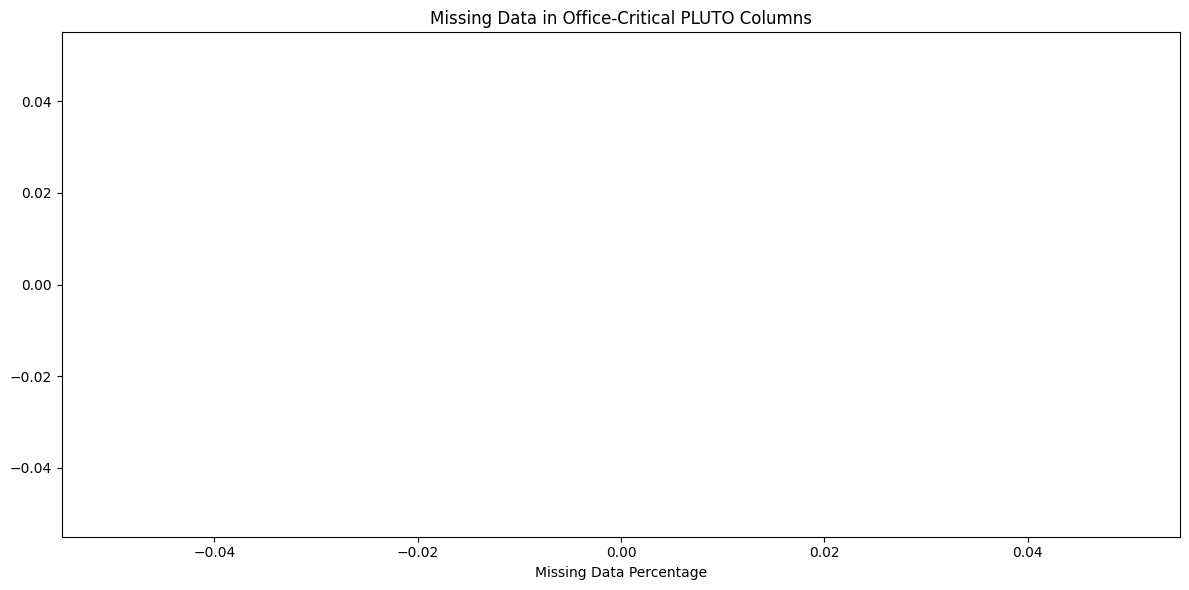

In [5]:
# Missing data analysis
print("Missing Data Analysis:")
print("="*50)
missing_data = df_pluto.isnull().sum()
missing_percent = (missing_data / len(df_pluto)) * 100

# Focus on office-critical columns
office_missing = pd.DataFrame({
    'Column': office_critical_columns,
    'Missing_Count': [missing_data.get(col, 0) for col in office_critical_columns],
    'Missing_Percent': [missing_percent.get(col, 0) for col in office_critical_columns]
})
office_missing = office_missing[office_missing['Column'].isin(df_pluto.columns)]
office_missing = office_missing.sort_values('Missing_Percent', ascending=False)

print(office_missing.to_string(index=False))

# Visualize missing data for critical columns
plt.figure(figsize=(12, 6))
plt.barh(office_missing['Column'], office_missing['Missing_Percent'])
plt.xlabel('Missing Data Percentage')
plt.title('Missing Data in Office-Critical PLUTO Columns')
plt.tight_layout()
plt.show()

## 3. Office Building Identification and Filtering

This section demonstrates PLUTO's unique ability to identify and classify office buildings - something no other dataset can do with this precision.

In [6]:
# Identify office buildings using PLUTO's unique classification system
print("Office Building Identification:")
print("="*50)

# Check available land use codes
if 'LandUse' in df_pluto.columns:
    print("Land Use Distribution:")
    landuse_counts = df_pluto['LandUse'].value_counts()
    print(landuse_counts.head(10))
    
    # Office-related land uses (typically codes 5, 6)
    office_landuses = ['05', '06', '5', '6']  # Office and commercial
    office_by_landuse = df_pluto[df_pluto['LandUse'].isin(office_landuses)]
    print(f"\nOffice buildings by land use: {len(office_by_landuse):,}")
    
# Check building classes for office identification
if 'BldgClass' in df_pluto.columns:
    print("\nBuilding Class Distribution (Top 15):")
    bldgclass_counts = df_pluto['BldgClass'].value_counts()
    print(bldgclass_counts.head(15))
    
    # Office building classes (O series typically)
    office_bldg_classes = [cls for cls in df_pluto['BldgClass'].unique() if str(cls).startswith('O')]
    if office_bldg_classes:
        office_by_class = df_pluto[df_pluto['BldgClass'].isin(office_bldg_classes)]
        print(f"\nOffice buildings by building class: {len(office_by_class):,}")
        print(f"Office building classes found: {office_bldg_classes}")

# Combined office building identification
office_filter = (
    (df_pluto['LandUse'].isin(['05', '06', '5', '6']) if 'LandUse' in df_pluto.columns else True) |
    (df_pluto['BldgClass'].str.startswith('O', na=False) if 'BldgClass' in df_pluto.columns else True)
)

office_buildings = df_pluto[office_filter]
print(f"\nTotal identified office buildings: {len(office_buildings):,}")
print(f"Percentage of total dataset: {len(office_buildings)/len(df_pluto)*100:.2f}%")

Office Building Identification:


KeyError: True

## 4. Key PLUTO Visualizations - Demonstrating Unique Value

These visualizations showcase the irreplaceable insights that only PLUTO can provide for office building analysis.

In [ ]:
# 1. Building Age Distribution - Critical for Vacancy Risk Assessment
plt.figure(figsize=(15, 10))

# Create subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('PLUTO Dataset: Unique Building Intelligence for Office Vacancy Prediction', fontsize=16, fontweight='bold')

# Building Age Analysis
if 'YearBuilt' in df_pluto.columns:
    current_year = 2025
    df_pluto['BuildingAge'] = current_year - pd.to_numeric(df_pluto['YearBuilt'], errors='coerce')
    
    # Filter reasonable building ages (0-200 years)
    valid_ages = df_pluto[(df_pluto['BuildingAge'] >= 0) & (df_pluto['BuildingAge'] <= 200)]
    
    axes[0,0].hist(valid_ages['BuildingAge'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0,0].set_title('Building Age Distribution\n(Only PLUTO provides this critical data)', fontweight='bold')
    axes[0,0].set_xlabel('Building Age (Years)')
    axes[0,0].set_ylabel('Number of Buildings')
    axes[0,0].grid(True, alpha=0.3)

# Building Size Distribution
if 'BldgArea' in df_pluto.columns:
    # Filter out unrealistic building sizes
    valid_sizes = df_pluto[(df_pluto['BldgArea'] > 0) & (df_pluto['BldgArea'] < 1000000)]
    
    axes[0,1].hist(np.log10(valid_sizes['BldgArea']), bins=50, alpha=0.7, color='forestgreen', edgecolor='black')
    axes[0,1].set_title('Building Size Distribution (Log Scale)\n(Essential for office space analysis)', fontweight='bold')
    axes[0,1].set_xlabel('Log10(Building Area Sq Ft)')
    axes[0,1].set_ylabel('Number of Buildings')
    axes[0,1].grid(True, alpha=0.3)

# Zoning District Analysis
if 'ZoneDist1' in df_pluto.columns:
    # Focus on commercial/office zoning
    commercial_zones = df_pluto['ZoneDist1'].value_counts().head(15)
    
    axes[1,0].barh(range(len(commercial_zones)), commercial_zones.values, color='coral')
    axes[1,0].set_yticks(range(len(commercial_zones)))
    axes[1,0].set_yticklabels(commercial_zones.index, fontsize=8)
    axes[1,0].set_title('Zoning Districts (Top 15)\n(Critical for office potential assessment)', fontweight='bold')
    axes[1,0].set_xlabel('Number of Properties')
    axes[1,0].grid(True, alpha=0.3)

# Building Class Distribution
if 'BldgClass' in df_pluto.columns:
    building_classes = df_pluto['BldgClass'].value_counts().head(15)
    
    axes[1,1].barh(range(len(building_classes)), building_classes.values, color='gold')
    axes[1,1].set_yticks(range(len(building_classes)))
    axes[1,1].set_yticklabels(building_classes.index, fontsize=8)
    axes[1,1].set_title('Building Classes (Top 15)\n(Unique building type classification)', fontweight='bold')
    axes[1,1].set_xlabel('Number of Buildings')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 KEY INSIGHT: These visualizations demonstrate PLUTO's unique value:")
print("   • Building age patterns reveal renovation needs and vacancy risk")
print("   • Size distribution shows office space availability across NYC")
print("   • Zoning analysis identifies office-suitable areas")
print("   • Building classification enables precise office building targeting")
print("\n💡 NO OTHER DATASET provides this comprehensive building intelligence!")